https://www.kaggle.com/datasets/zohasohail/soil-detection-for-cotton-crop/data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
df = pd.read_csv("/content/soil1.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample ID                48 non-null     int64  
 1   ph                       48 non-null     float64
 2   Temperature              48 non-null     float64
 3   Humidity                 48 non-null     float64
 4   Density                  48 non-null     float64
 5   Electrical Conductivity  48 non-null     float64
 6   N                        48 non-null     int64  
 7   P                        48 non-null     int64  
 8   K                        48 non-null     int64  
 9   Ca                       48 non-null     float64
 10  Mg                       48 non-null     float64
 11  Grain Surface            48 non-null     int64  
 12  Particle Spacing         48 non-null     int64  
 13  Particle Width           48 non-null     int64  
 14  Cotton Crop              48 

In [6]:
df.describe()

,Sample ID,ph,Temperature,Humidity,Density,Electrical Conductivity,N,P,K,Ca,Mg,Grain Surface,Particle Spacing,Particle Width,Cotton Crop
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,6.819801,25.042049,66.221716,1.371875,6.716667,64.083333,55.083333,33.645833,18.672917,11.826042,1.312500,1.416667,1.666667,0.333333
std,14.00,0.817940,4.463068,18.262961,0.191519,3.188573,43.625989,13.208368,17.982840,16.678087,5.200344,0.948823,0.498224,0.476393,0.476393
min,1.00,4.371746,17.024985,15.658092,0.920000,0.670000,2.000000,18.000000,15.000000,3.820000,5.150000,0.000000,1.000000,1.000000,0.000000
25%,12.75,6.337559,21.288970,60.326464,1.275000,4.967500,26.500000,47.000000,20.000000,6.117500,7.987500,1.000000,1.000000,1.000000,0.000000
50%,24.50,6.859484,25.731311,71.584142,1.420000,6.430000,50.000000,56.000000,29.500000,8.985000,9.675000,1.000000,1.000000,2.000000,0.000000
75%,36.25,7.348310,28.040214,78.028476,1.522500,9.085000,100.000000,60.250000,42.000000,31.797500,16.430000,2.000000,2.000000,2.000000,1.000000
max,48.00,8.840656,36.891637,91.635362,1.680000,13.320000,143.000000,79.000000,85.000000,56.410000,24.540000,3.000000,2.000000,2.000000,1.000000


In [7]:
df.corr()

,Sample ID,ph,Temperature,Humidity,Density,Electrical Conductivity,N,P,K,Ca,Mg,Grain Surface,Particle Spacing,Particle Width,Cotton Crop
Sample ID,1.000000,0.074592,0.384551,0.239176,0.414976,0.302176,-0.330768,0.073293,-0.336145,-0.125238,0.077934,0.066472,0.036604,-0.204168,-0.079753
ph,0.074592,1.000000,0.003359,-0.005176,-0.082161,0.179519,0.093829,0.058476,-0.026760,-0.042173,0.000528,-0.065163,-0.021744,-0.061524,-0.001598
Temperature,0.384551,0.003359,1.000000,0.235122,0.056491,-0.141551,-0.291214,0.136655,-0.609547,-0.232802,-0.158710,-0.087228,-0.149229,-0.122429,-0.191487
Humidity,0.239176,-0.005176,0.235122,1.000000,-0.169520,-0.259426,0.367500,-0.586908,-0.498679,0.356161,0.300905,0.034835,0.300993,0.103432,0.317941
Density,0.414976,-0.082161,0.056491,-0.169520,1.000000,0.558667,-0.132285,0.048972,0.193191,0.139420,0.322807,0.381921,0.419761,-0.018656,0.373118
Electrical Conductivity,0.302176,0.179519,-0.141551,-0.259426,0.558667,1.000000,-0.460207,0.059544,0.173685,-0.255040,-0.064924,0.091636,-0.116565,-0.375570,-0.155850
N,-0.330768,0.093829,-0.291214,0.367500,-0.132285,-0.460207,1.000000,-0.317706,0.160511,0.797389,0.650673,0.170523,0.586679,0.454884,0.769514
P,0.073293,0.058476,0.136655,-0.586908,0.048972,0.059544,-0.317706,1.000000,0.047065,-0.290641,-0.217509,-0.285642,-0.176747,0.078898,-0.291921
K,-0.336145,-0.026760,-0.609547,-0.498679,0.193191,0.173685,0.160511,0.047065,1.000000,0.261447,0.258322,0.339567,0.107062,0.028147,0.252497
Ca,-0.125238,-0.042173,-0.232802,0.356161,0.139420,-0.255040,0.797389,-0.290641,0.261447,1.000000,0.822801,0.399092,0.735186,0.347553,0.898142


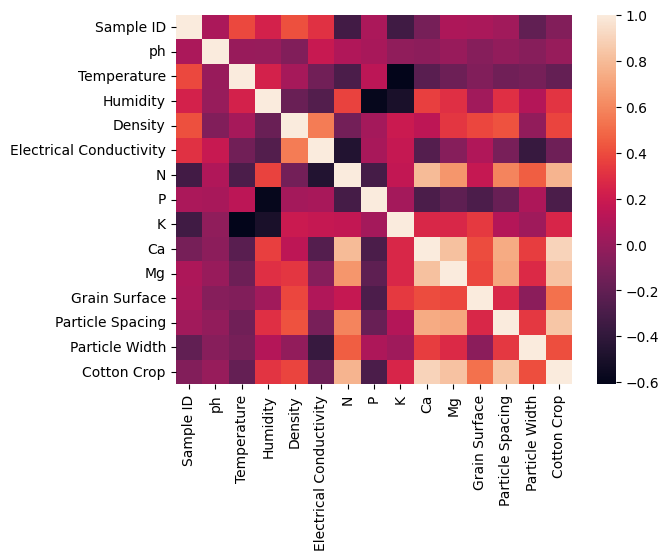

In [24]:
import seaborn as sns

#plotting the heatmap for correlation
ax = sns.heatmap(df.corr())

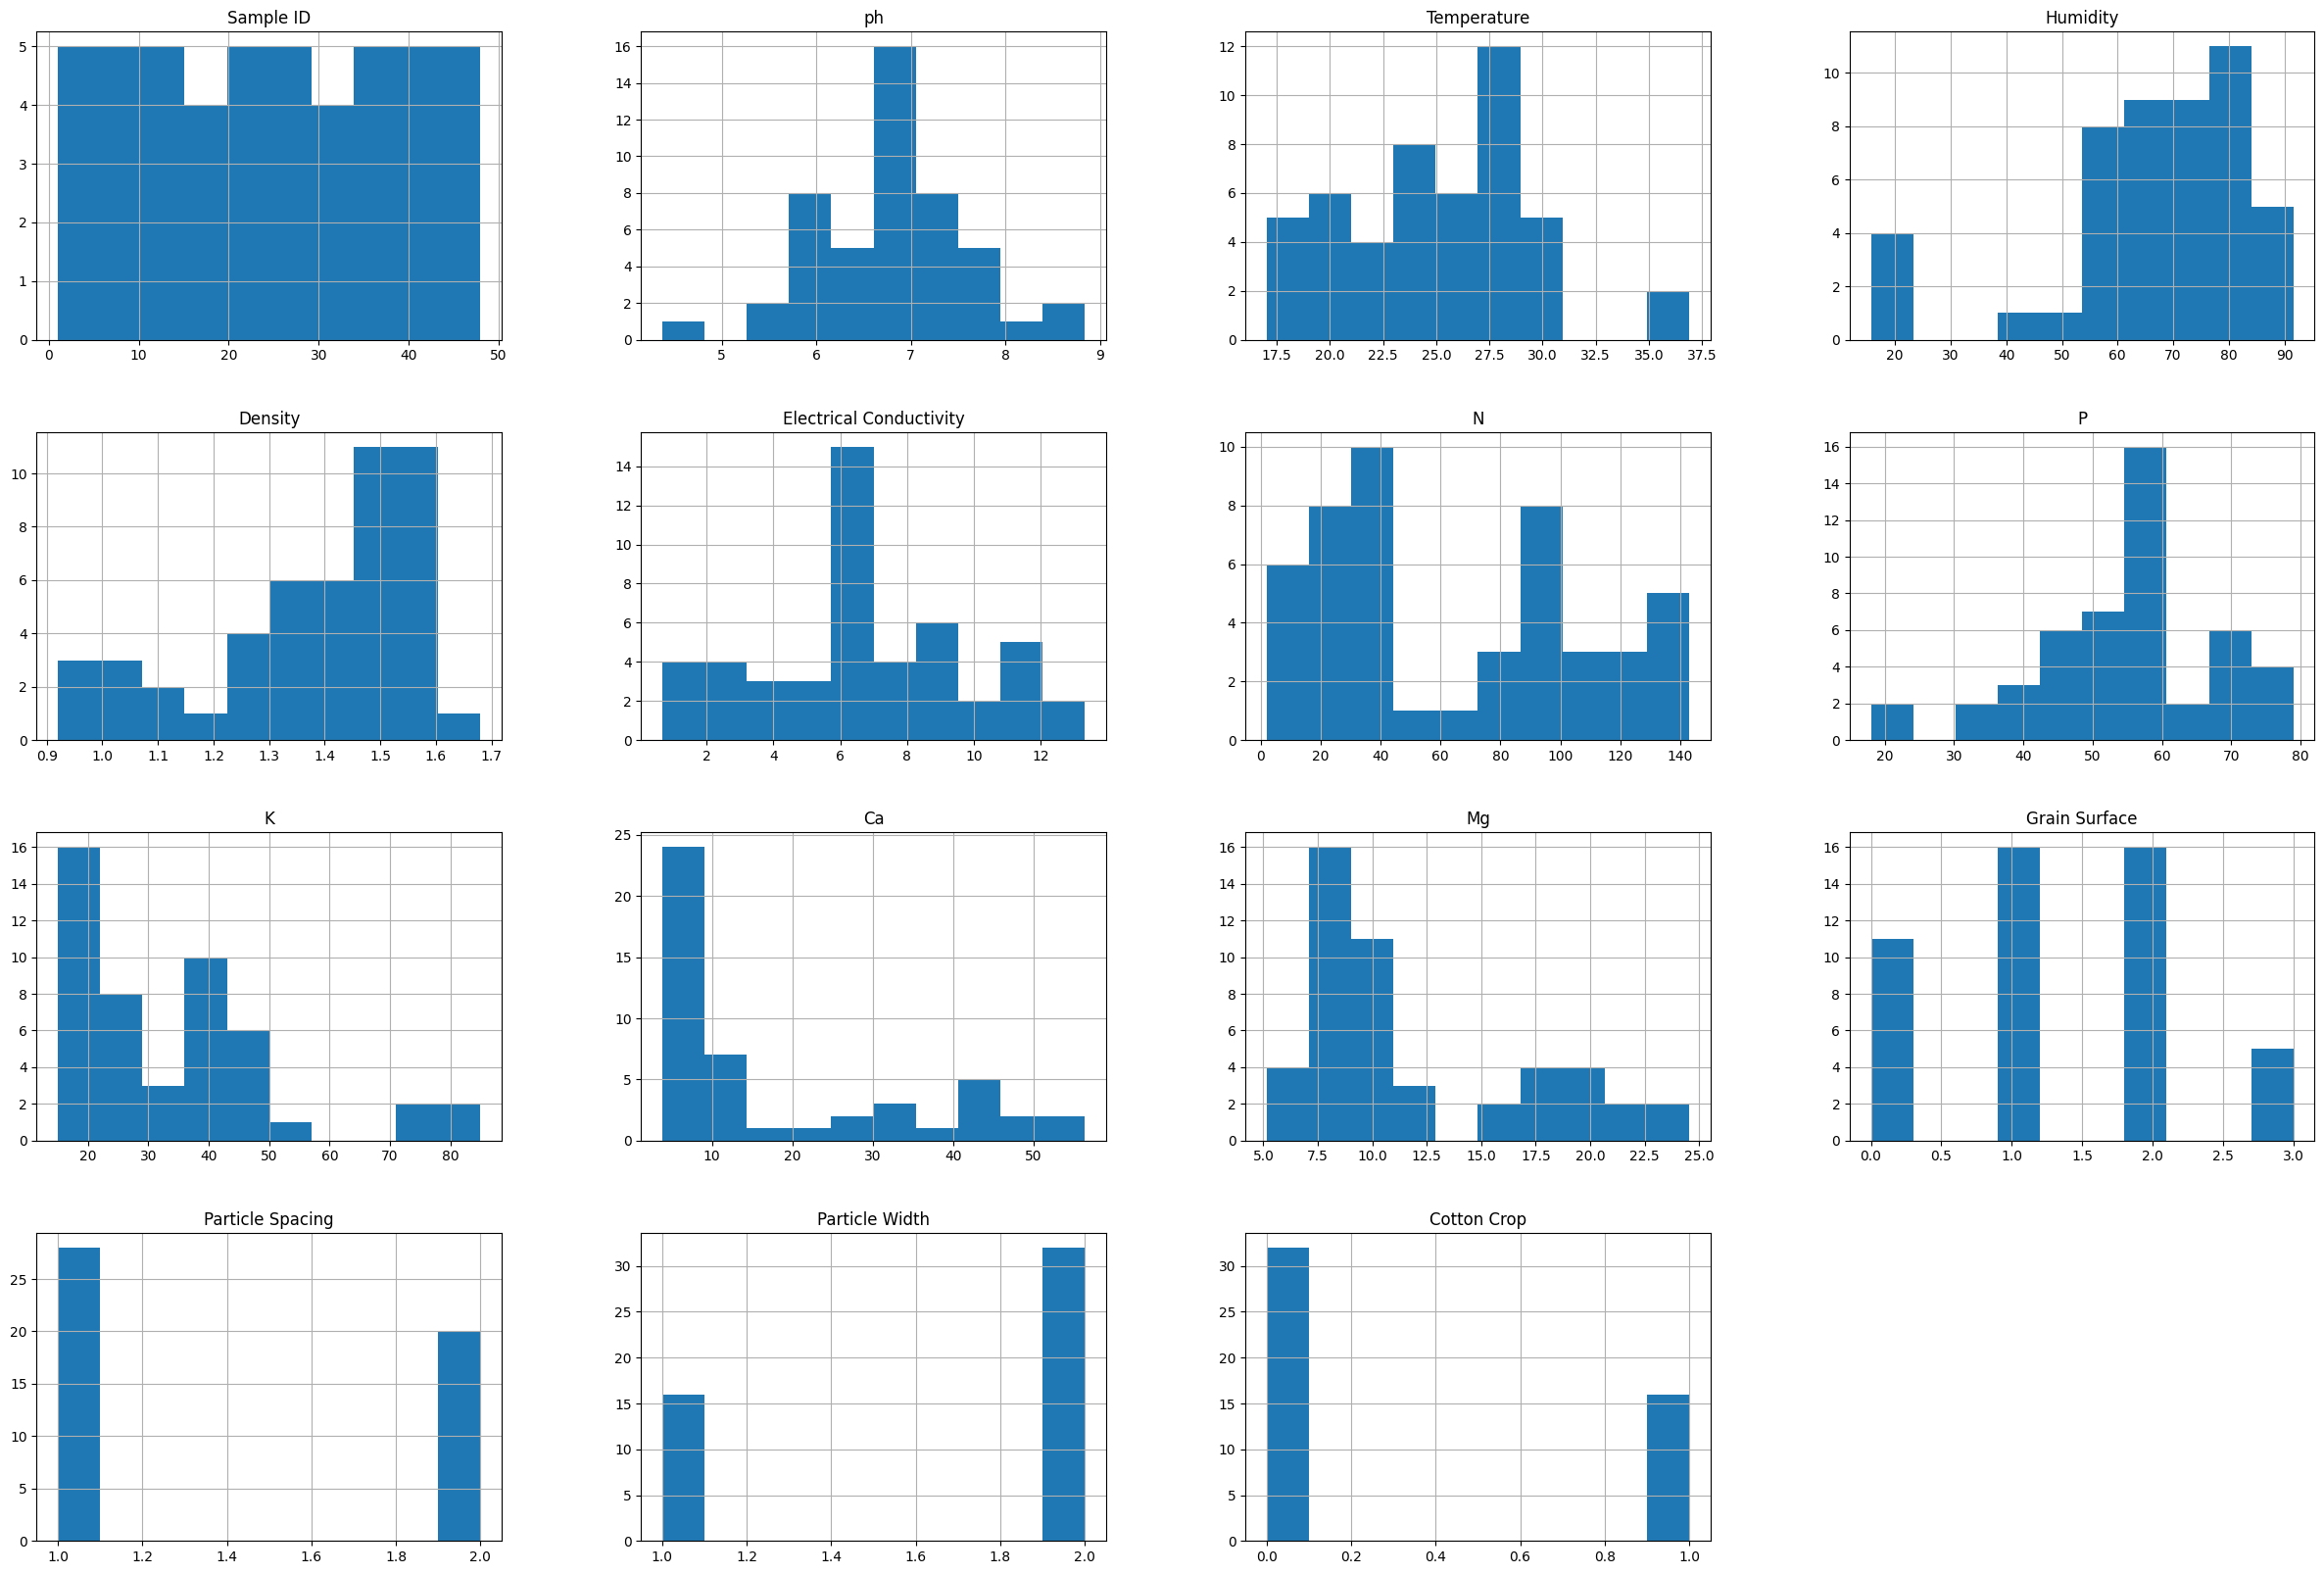

In [8]:
df.hist(figsize=(30,20))
plt.show()

In [9]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import joblib
import numpy as np

# Read original dataset
cottonYield_df = pd.read_csv("/content/soil1.csv")
cottonYield_df.sample(frac=1, random_state=42)

# selecting features and target data
X = cottonYield_df[['ph',	'Temperature',	'Humidity',	'Density',	'Electrical Conductivity',	'N',	'P',	'K',	'Ca',	'Mg',	'Grain Surface',	'Particle Spacing',	'Particle Width']]
y = cottonYield_df[['Cotton Crop']]


In [10]:
#smooth, scaly, gritty, fibrous 0123
#close crowded 1 2
#narrow broad 1 2

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.tree import DecisionTreeClassifier

regg = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)


# predict on the test set


y_pred = regg.predict(X_test)

# calculate accuracy
accuracy = mean_squared_error(y_test, y_pred)
print(f"mean sq error: {accuracy}")  # Accuracy: 0.91

# save the model to disk
joblib.dump(regg, "soilPredModel.sav")

mean sq error: 0.0


['soilPredModel.sav']

In [12]:
import joblib
def predict(data):
  clf = joblib.load("/content/soilPredModel.sav")
  return clf.predict(data)



In [13]:
a=predict(np.array([6.502985292, 20.87974371, 82.00274423, 0.92, 7.4, 100, 50,	43,	30,	19,	0, 1,	1]).reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
a[0]

0

In [15]:
import sklearn

[Text(0.4, 0.8333333333333334, 'x[8] <= 15.995\ngini = 0.422\nsamples = 33\nvalue = [23, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.11\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

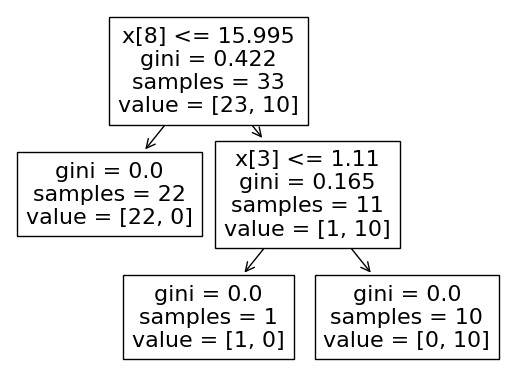

In [16]:
sklearn.tree.plot_tree(regg)

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

regg2 = ExtraTreesClassifier(random_state=0).fit(X_train, y_train)

# predict on the test set

y_pred = regg2.predict(X_test)

# calculate accuracy
accuracy = mean_squared_error(y_test, y_pred)
print(f"mean sq error: {accuracy}")  # Accuracy: 0.91

# save the model to disk
joblib.dump(regg2, "soilPredModel2.sav")

mean sq error: 0.0


<ipython-input-17-bf3e953c1c57>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regg2 = ExtraTreesClassifier(random_state=0).fit(X_train, y_train)


['soilPredModel2.sav']

In [18]:
import joblib
def predict(data):
  clf = joblib.load("/content/soilPredModel2.sav")
  return clf.predict(data)

a=predict(np.array([6.502985292, 20.87974371, 82.00274423, 0.92, 7.4, 100, 50,	43,	30,	19,	0, 1,	1]).reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [19]:
from sklearn import tree

#Fit an Extra Tree model to the data
model = tree.ExtraTreeClassifier()
model.fit(X_train, y_train)

#Use http://webgraphviz.com to visualize the graph of this file
f = tree.export_graphviz(model, out_file="/content/tree.dot")

In [20]:
from graphviz import Source

path = '/content/tree.dot'
s = Source.from_file(path)
print(s.source)

s.render('abcd', format='jpg',view=True)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[7] <= 33.755\ngini = 0.422\nsamples = 33\nvalue = [23, 10]"] ;
1 [label="x[4] <= 4.71\ngini = 0.188\nsamples = 19\nvalue = [17, 2]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 7\nvalue = [7, 0]"] ;
1 -> 2 ;
3 [label="x[9] <= 9.244\ngini = 0.278\nsamples = 12\nvalue = [10, 2]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
3 -> 4 ;
5 [label="x[5] <= 50.385\ngini = 0.375\nsamples = 8\nvalue = [6, 2]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 6\nvalue = [6, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
5 -> 7 ;
8 [label="x[12] <= 1.36\ngini = 0.49\nsamples = 14\nvalue = [6, 8]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="x[11] <= 1.453\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 4\nvalue = [4, 0]"] ;
9 -> 10 ;
11 [label=

'abcd.jpg'

In [21]:
a=plt.imread("/content/abcd.jpg")

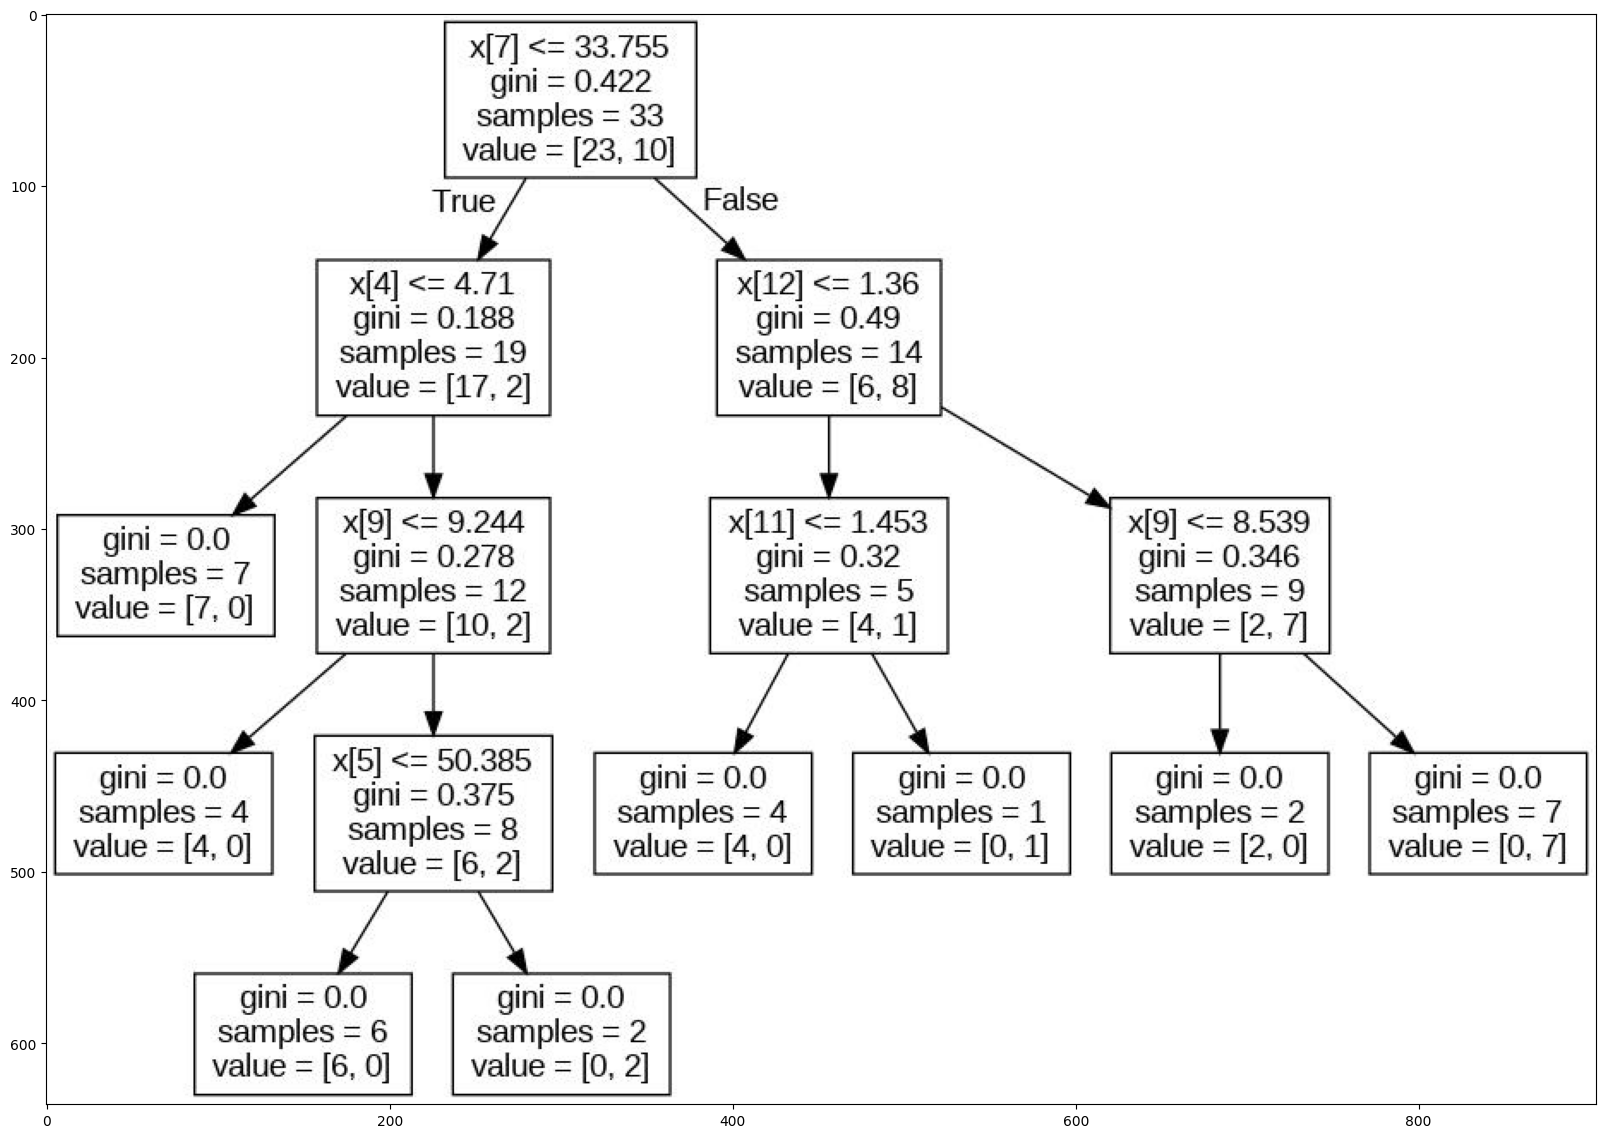

In [22]:
plt.figure(figsize=(20, 20))
plt.imshow(a)